Step 0: Prerequisites

In [10]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


Cell 1: Load Dataset

In [14]:
import pandas as pd
df = pd.read_csv('../data/medical_dataset.csv')  # Update the path to the correct location of the file
df.head()

,fever,cough,sore_throat,headache,fatigue,nausea,shortness_of_breath,chest_pain,rash,diarrhea,disease
0,0,0,1,0,0,0,0,0,1,0,Migraine
1,0,0,0,1,0,1,1,0,0,1,Allergy
2,0,1,0,0,1,0,1,1,1,0,Viral Infection
3,0,1,0,1,1,0,0,0,0,1,Tuberculosis
4,0,1,1,1,1,0,1,1,0,1,Flu


 Cell 2: Basic Info

In [15]:
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fever                1000 non-null   int64 
 1   cough                1000 non-null   int64 
 2   sore_throat          1000 non-null   int64 
 3   headache             1000 non-null   int64 
 4   fatigue              1000 non-null   int64 
 5   nausea               1000 non-null   int64 
 6   shortness_of_breath  1000 non-null   int64 
 7   chest_pain           1000 non-null   int64 
 8   rash                 1000 non-null   int64 
 9   diarrhea             1000 non-null   int64 
 10  disease              1000 non-null   object
dtypes: int64(10), object(1)
memory usage: 86.1+ KB
None

Basic Statistics:
             fever        cough  sore_throat     headache      fatigue  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.521000 

Cell 3: Disease Distribution

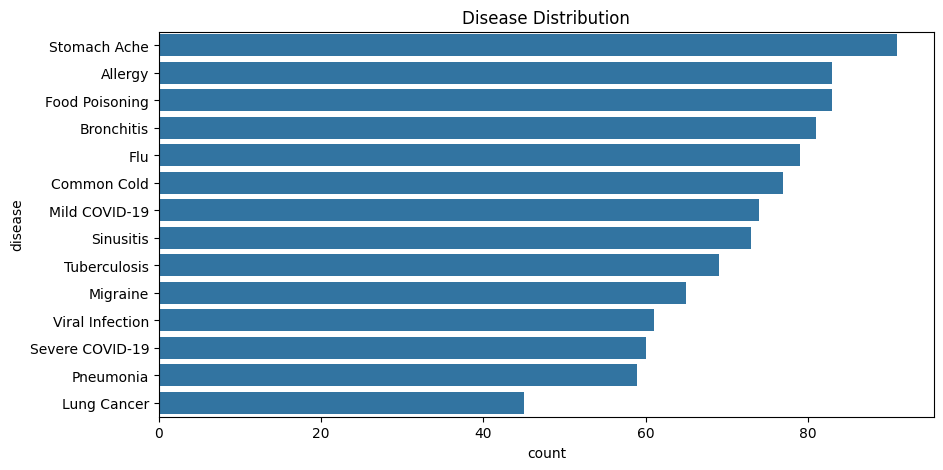

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y='disease', data=df, order=df['disease'].value_counts().index)
plt.title("Disease Distribution")
plt.show()

Cell 4: Correlation Heatmap

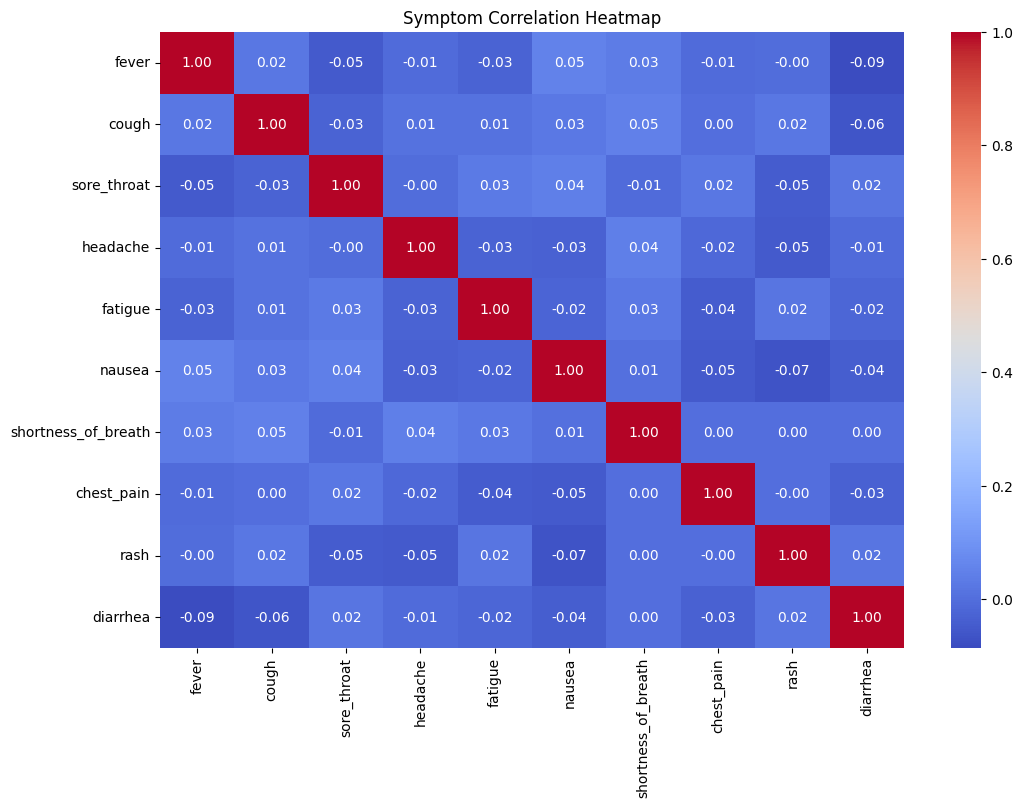

In [19]:
plt.figure(figsize=(12,8))
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Symptom Correlation Heatmap")
plt.show()

Cell 5: Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("disease", axis=1)
y = df["disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Cell 6: Train Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 Cell 7: Evaluate Model

In [22]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.08

Classification Report:
                  precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00        13
     Bronchitis       0.18      0.31      0.23        13
    Common Cold       0.08      0.13      0.10        15
            Flu       0.07      0.04      0.05        25
 Food Poisoning       0.11      0.17      0.13        12
    Lung Cancer       0.00      0.00      0.00        11
       Migraine       0.00      0.00      0.00        15
  Mild COVID-19       0.08      0.06      0.07        17
      Pneumonia       0.07      0.14      0.09         7
Severe COVID-19       0.00      0.00      0.00        16
      Sinusitis       0.18      0.25      0.21         8
   Stomach Ache       0.12      0.10      0.11        21
   Tuberculosis       0.00      0.00      0.00        19
Viral Infection       0.07      0.12      0.09         8

       accuracy                           0.08       200
      macro avg       0.07      0.09      0.08

Cell 8: Confusion Matrix

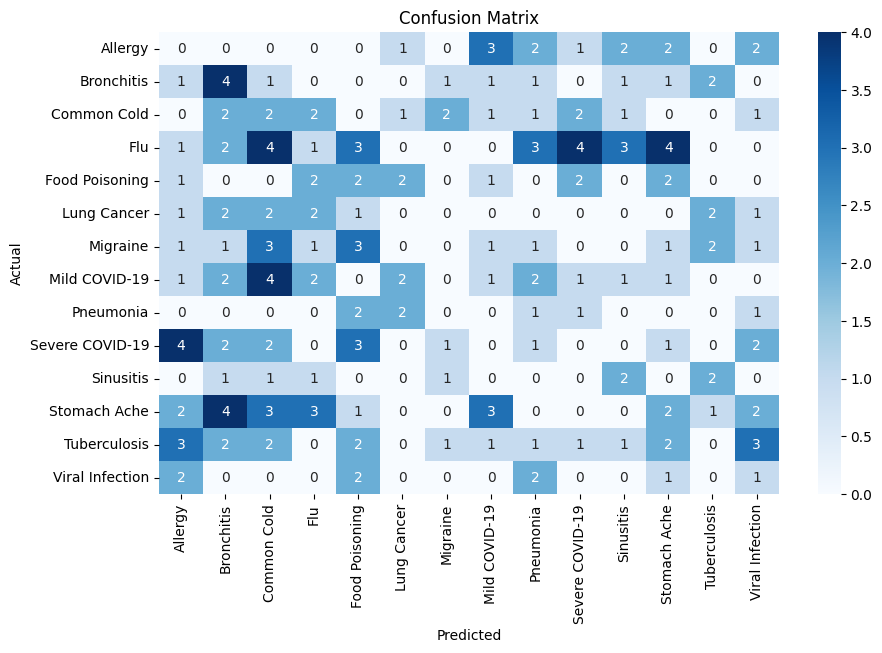

In [23]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Cell 9: Feature Importance

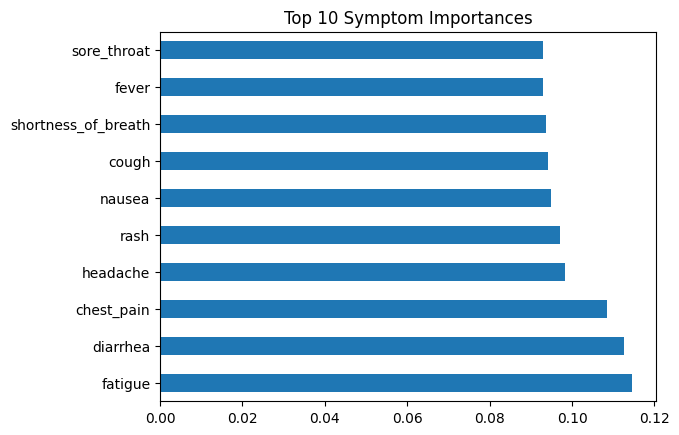

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Symptom Importances")
plt.show()

Cell 10: Save Model

In [28]:
import joblib
joblib.dump(model, '../models/rf_model.pkl')

['../models/rf_model.pkl']

Cell 11: Load Model

In [30]:
model = joblib.load('../models/rf_model.pkl')

Cell 12: Define Prediction Function

In [31]:
def predict_disease(symptoms_list):
    input_dict = {col: 1 if col in symptoms_list else 0 for col in X.columns}
    input_df = pd.DataFrame([input_dict])
    return model.predict(input_df)[0]

Cell 13: Predict Example

In [32]:
symptoms_input = ['fever', 'fatigue', 'nausea']
prediction = predict_disease(symptoms_input)
print("Predicted disease for", symptoms_input, "->", prediction)

Predicted disease for ['fever', 'fatigue', 'nausea'] -> Sinusitis


 Cell 14: Markdown Visual Summary (Optional)

In [33]:
from IPython.display import display, Markdown
display(Markdown(f"### ✅ Based on symptoms {symptoms_input}, the predicted disease is: **{prediction}**"))

### ✅ Based on symptoms ['fever', 'fatigue', 'nausea'], the predicted disease is: **Sinusitis**